In [ ]:
!rm -rf antihydrogen_test.csv.gz
!rm -rf antihydrogen_test.csv
!rm -rf antihydrogen_train.csv.gz
!rm -rf antihydrogen_train.csv
!rm -rf antihydrogen_valid.csv.gz
!rm -rf antihydrogen_valid.csv

!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_test.csv.gz
!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_train.csv.gz
!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_valid.csv.gz

!gunzip antihydrogen_test.csv.gz
!gunzip antihydrogen_train.csv.gz
!gunzip antihydrogen_valid.csv.gz


--2025-01-07 21:31:20--  http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_test.csv.gz
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6608724 (6.3M) [application/x-gzip]
Saving to: ‘antihydrogen_test.csv.gz’

antihydrogen_test.c 100%[===================>]   6.30M  8.20MB/s    in 0.8s    

2025-01-07 21:31:21 (8.20 MB/s) - ‘antihydrogen_test.csv.gz’ saved [6608724/6608724]

--2025-01-07 21:31:21--  http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_train.csv.gz
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19840043 (19M) [application/x-gzip]
Saving to: ‘antihydrogen_train.csv.gz’

antihydrogen_train. 100%[===================>]  18.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

train = pd.read_csv('antihydrogen_train.csv',sep=' ',nrows=4000,dtype='int8')
test = pd.read_csv('antihydrogen_test.csv',sep=' ',nrows=1000,dtype='int8')
valid = pd.read_csv('antihydrogen_valid.csv',sep=' ',nrows=1000,dtype='int8')


In [ ]:
#Divisione del database di train nelle 4 componenti dei rivelatori
target_train = train['0']
target_test = test['1']
target_valid = valid['0']

#Canale 1 (interno)
inner_Z_train = train[train.columns[1:447]]
inner_phi_train = train[train.columns[448:693]]

inner_Z_test = test[test.columns[1:447]]
inner_phi_test = test[test.columns[448:693]]

inner_Z_valid = valid[valid.columns[1:447]]
inner_phi_valid = valid[valid.columns[448:693]]

inner_channel_train = train[train.columns[1:693]]
inner_channel_test = test[test.columns[1:693]]
inner_channel_valid = valid[valid.columns[1:693]]



#Canale 2 (esterno)
outer_Z_train = train[train.columns[694:1140]]
outer_phi_train = train[train.columns[1141:1430]]

outer_Z_test = test[test.columns[694:1140]]
outer_phi_test = test[test.columns[1141:1430]]

outer_Z_vali = valid[valid.columns[694:1140]]
outer_phi_valid = valid[valid.columns[1141:1430]]

outer_channel_train = train[train.columns[694:1430]]
outer_channel_test = test[test.columns[694:1430]]
outer_channel_valid = valid[valid.columns[694:1430]]



In [ ]:
t=train.shape[0]
#t=10
inner_Z_trainx=[]
inner_phi_trainx=[]
outer_Z_trainx=[]
outer_phi_trainx=[]
for i in range (t):
  inner_Z_trainx.append(inner_Z_train.iloc[i, : ].values)
  inner_phi_trainx.append(inner_phi_train.iloc[i, : ].values)
  inner_phi_trainx[i]=inner_phi_trainx[i].reshape(1,245)
  outer_Z_trainx.append(outer_Z_train.iloc[i, : ].values)
  outer_phi_trainx.append(outer_phi_train.iloc[i, : ].values)
  outer_phi_trainx[i]=outer_phi_trainx[i].reshape(1,289)
  zero_inner=np.zeros(245)
  zero_inner=zero_inner.reshape(1,245)
  zero_outer=np.zeros(289)
  zero_outer=zero_outer.reshape(1,289)

In [ ]:


g=[]
k=[]
for i in range (t):
  a=inner_Z_trainx[i]
  b=inner_phi_trainx[i]
  if a[0]==0:
    g.append(zero_inner)
  else:
    g.append(b)

for i in range (t):
  a=outer_Z_trainx[i]
  b=outer_phi_trainx[i]
  if a[0]==0:
    k.append(zero_outer)
  else:
    k.append(b)






In [ ]:
for j in range (t):
  a=inner_Z_trainx[j]
  b=inner_phi_trainx[j]
  for i in range(445):
    if a[i+1]==0 :
      g[j]=np.concatenate((g[j],zero_inner))
    else:
      g[j]=np.concatenate((g[j],b))
gs=g[0]
for i in range (t-1):
  #a=g[(i+1)]
  gs=gs+g[i+1]

for j in range (t):
  a=outer_Z_trainx[j]
  b=outer_phi_trainx[j]
  for i in range(445):
    if a[i+1]==0 :
      k[j]=np.concatenate((k[j],zero_outer))
    else:
      k[j]=np.concatenate((k[j],b))
#print(k)
ks=k[0]
for i in range (t-1):
  #a=k[(i+1)]
  ks=ks+k[i+1]


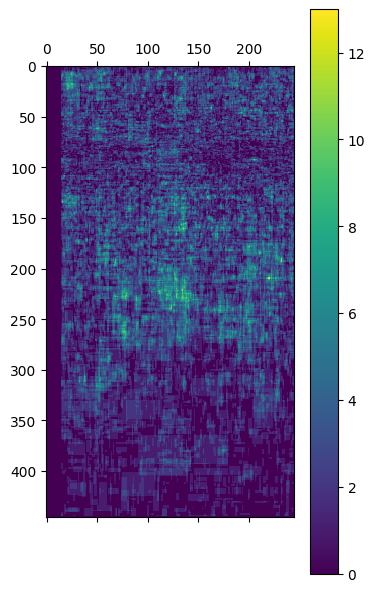

<Figure size 640x480 with 0 Axes>

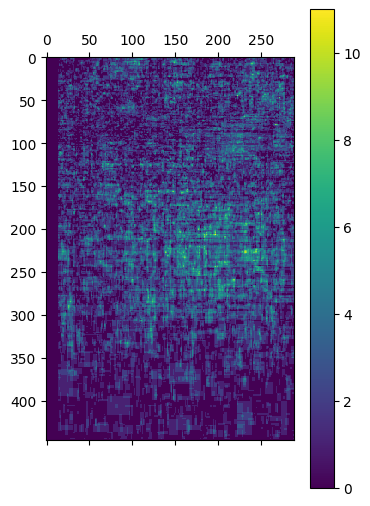

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.matshow(gs)
cb = plt.colorbar()
plt.show()
plt.savefig('imm1.png')
plt.matshow(ks)
cb = plt.colorbar()
plt.show()
plt.savefig('imm2.png')

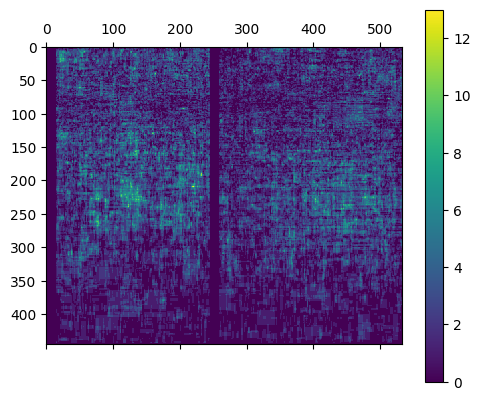

In [ ]:
z=np.concatenate((g[0],k[0]),axis=1)
for i in range(t-1):
  a=np.concatenate((g[i+1],k[i+1]),axis=1)
  z=z+a

plt.matshow(z)
cb = plt.colorbar()


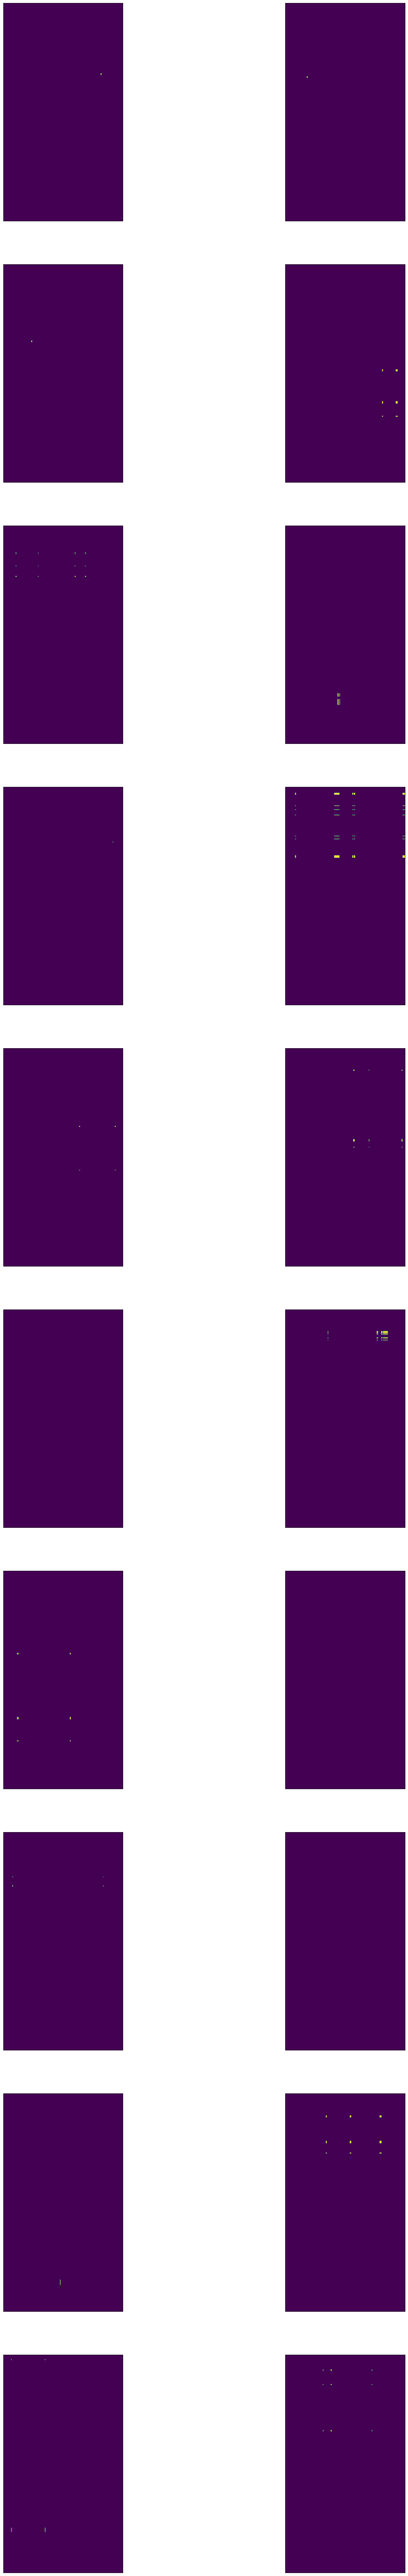

In [ ]:
plt.figure(figsize=(20, 100))
n=20
for i in range(n):
    ax = plt.subplot(10, 2, i + 1)
    plt.imshow(g[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)